# Analisis explroatorio de los datos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats


# datos

In [2]:
# !git clone git@github.com:juanguzman2/Precio-de-viviendas-en-colmbia.git

In [3]:
dfp=pd.read_csv(r'C:\Users\Juan Guzman\pviviendas\Data\dfanalisis')
dfp.head()

,precio,area,habitaciones,banos,garajes,balcon,trasn. publico,estrato,antiguedad,cocina,...,zonas verdes,supermercado o cc,instalacion de gas,parqueadero visitantes,colegios / universidades,parques cercanos,zona residencial,closet,municipio,tipo vivienda
0,1380000000,32000.0,5.0,6.0,2,1.0,1.0,5.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RIONEGRO,Municipio
1,496122600,91972.0,3.0,3.0,1,1.0,1.0,3.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,RIONEGRO,Municipio
2,360002000,73372.0,3.0,3.0,0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,RIONEGRO,Municipio
3,1350000000,28200.0,4.0,5.0,4,1.0,0.0,6.0,4.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,RIONEGRO,Municipio
4,950000000,23000.0,3.0,3.0,2,0.0,0.0,6.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RIONEGRO,Municipio


In [4]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852 entries, 0 to 1851
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   precio                    1852 non-null   int64  
 1   area                      1852 non-null   float64
 2   habitaciones              1852 non-null   float64
 3   banos                     1852 non-null   float64
 4   garajes                   1852 non-null   int64  
 5   balcon                    1852 non-null   float64
 6   trasn. publico            1852 non-null   float64
 7   estrato                   1852 non-null   float64
 8   antiguedad                1852 non-null   float64
 9   cocina                    1852 non-null   float64
 10  bano aux                  1852 non-null   float64
 11  zona lavanderia           1852 non-null   float64
 12  zonas verdes              1852 non-null   float64
 13  supermercado o cc         1852 non-null   float64
 14  instalac

In [5]:
dfp.describe(exclude=[object])

,precio,area,habitaciones,banos,garajes,balcon,trasn. publico,estrato,antiguedad,cocina,bano aux,zona lavanderia,zonas verdes,supermercado o cc,instalacion de gas,parqueadero visitantes,colegios / universidades,parques cercanos,zona residencial,closet
count,1.852000e+03,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000
mean,6.663348e+08,13463.229369,3.168467,2.854212,1.500540,0.539417,0.592333,4.050756,1.707343,0.676566,0.457343,0.542117,0.462743,0.392009,0.423326,0.336393,0.381210,0.427646,0.526458,0.364471
std,5.081885e+08,14833.552550,1.170832,1.264705,1.830913,0.498579,0.491533,0.899976,1.378891,0.467913,0.498312,0.498358,0.498745,0.488330,0.494220,0.472603,0.485815,0.494871,0.499434,0.481411
min,9.500000e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100000e+08,5600.000000,3.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+08,7900.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,8.700000e+08,18066.500000,4.000000,4.000000,2.000000,1.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2.300000e+09,91972.000000,12.000000,12.000000,11.000000,1.000000,1.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
dfp.head()

,precio,area,habitaciones,banos,garajes,balcon,trasn. publico,estrato,antiguedad,cocina,...,zonas verdes,supermercado o cc,instalacion de gas,parqueadero visitantes,colegios / universidades,parques cercanos,zona residencial,closet,municipio,tipo vivienda
0,1380000000,32000.0,5.0,6.0,2,1.0,1.0,5.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RIONEGRO,Municipio
1,496122600,91972.0,3.0,3.0,1,1.0,1.0,3.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,RIONEGRO,Municipio
2,360002000,73372.0,3.0,3.0,0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,RIONEGRO,Municipio
3,1350000000,28200.0,4.0,5.0,4,1.0,0.0,6.0,4.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,RIONEGRO,Municipio
4,950000000,23000.0,3.0,3.0,2,0.0,0.0,6.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RIONEGRO,Municipio


In [13]:
dfp['tipo vivienda'].value_counts()

Municipio    1852
Name: tipo vivienda, dtype: int64

## Relacion entre variables

In [11]:
dfp.corr()

,precio,area,habitaciones,banos,garajes,balcon,trasn. publico,estrato,antiguedad,cocina,bano aux,zona lavanderia,zonas verdes,supermercado o cc,instalacion de gas,parqueadero visitantes,colegios / universidades,parques cercanos,zona residencial,closet
precio,1.000000,0.215935,0.447909,0.684849,0.460726,-0.116462,-0.023627,0.391496,0.106753,-0.007571,-0.029208,-0.117346,-0.046782,-0.178518,-0.179361,-0.111256,-0.219366,-0.062246,-0.159723,0.006242
area,0.215935,1.000000,0.192634,0.272983,0.085821,-0.019012,0.010137,0.052420,-0.055754,-0.035695,0.043539,0.043493,-0.010391,0.062594,-0.042587,-0.066653,0.037271,-0.038161,-0.026577,-0.000857
habitaciones,0.447909,0.192634,1.000000,0.649603,0.289778,-0.074314,0.048056,-0.046572,0.165747,-0.075033,-0.084903,-0.149198,-0.121545,-0.087220,-0.136384,-0.140549,-0.100618,0.019184,-0.112950,-0.100367
banos,0.684849,0.272983,0.649603,1.000000,0.364000,-0.036291,0.032963,0.306009,0.072487,0.029828,0.051848,-0.015968,-0.014611,-0.074493,-0.072347,-0.085121,-0.088873,-0.001326,-0.060604,0.002136
garajes,0.460726,0.085821,0.289778,0.364000,1.000000,0.010629,0.025157,0.127195,0.016326,-0.027858,0.026672,-0.103344,0.013038,-0.100541,-0.122050,-0.012385,-0.103485,-0.037819,-0.122904,0.045440
balcon,-0.116462,-0.019012,-0.074314,-0.036291,0.010629,1.000000,0.212203,0.148448,-0.182027,0.271201,0.313375,0.211832,0.218825,0.149520,0.197538,0.247491,0.185509,0.146227,0.221449,0.121306
trasn. publico,-0.023627,0.010137,0.048056,0.032963,0.025157,0.212203,1.000000,-0.015485,-0.023878,0.156927,0.069025,0.086670,0.091171,0.420814,0.301589,0.258093,0.431696,0.501663,0.240924,-0.138868
estrato,0.391496,0.052420,-0.046572,0.306009,0.127195,0.148448,-0.015485,1.000000,-0.095119,0.194237,0.212031,0.143390,0.185960,0.038293,0.111998,0.128770,0.012562,0.007037,0.118407,0.168013
antiguedad,0.106753,-0.055754,0.165747,0.072487,0.016326,-0.182027,-0.023878,-0.095119,1.000000,-0.095708,-0.177001,-0.091333,-0.088921,-0.093496,-0.070998,-0.076830,-0.110798,-0.014422,-0.148001,-0.064666
cocina,-0.007571,-0.035695,-0.075033,0.029828,-0.027858,0.271201,0.156927,0.194237,-0.095708,1.000000,0.370602,0.414075,0.329153,0.224173,0.326068,0.243082,0.224220,0.124028,0.391499,0.276573


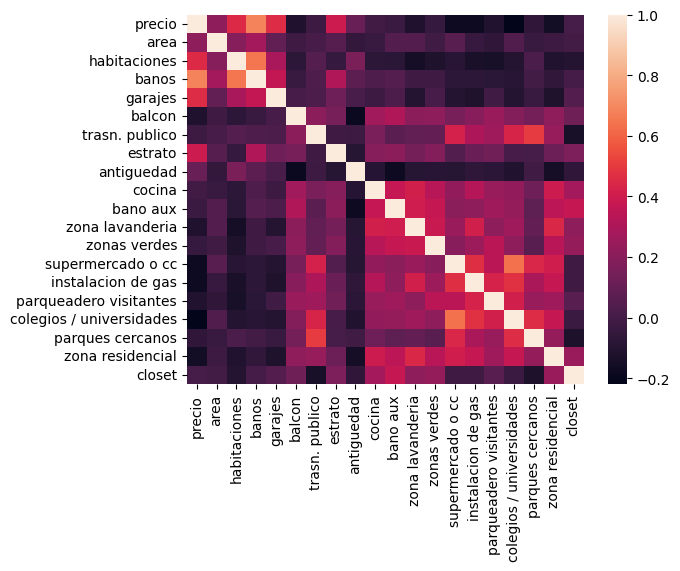

In [10]:
sns.heatmap(dfp.corr());

Se observa una correlacion positiva en la mayoria de variables respecto al precio, esto es u buen indicio ya que se espera que una vivienda al tener mas caracteristicas , pues sea mas costosa. por otro lado se observa que hay algunas variables que tienen una correlacion casi nula y otras con una correlacion negativa